# PCA

In [1]:
import pandas as pd

df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Dados: 70% treinamento e 30% para teste
\+ Estandardização

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
    
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Matriz de covariânica + Autovalores + Autovetores

In [7]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
#print('\nMatriz de Covariância \n%s' % cov_mat)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nAutovalores \n%s' % eigen_vals)
print('\nAutovetores \n%s' % eigen_vecs)


Autovalores 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]

Autovetores 
[[  1.46698114e-01   5.04170789e-01  -1.17235150e-01   2.06254611e-01
   -1.87815947e-01  -1.48851318e-01  -1.79263662e-01  -5.54687162e-02
   -4.03054922e-01  -4.17197583e-01   2.75660860e-01   4.03567189e-01
    4.13320786e-04]
 [ -2.42245536e-01   2.42168894e-01   1.49946576e-01   1.30489298e-01
    5.68639776e-01  -2.69052764e-01  -5.92636731e-01   3.32731614e-02
   -1.01833706e-01   2.17101488e-01  -8.13845005e-02  -1.52474999e-01
   -8.78560762e-02]
 [ -2.99344215e-02   2.86984836e-01   6.56394387e-01   1.51536318e-02
   -2.99209426e-01  -9.33386061e-02   6.07334578e-02  -1.00618575e-01
    3.51841423e-01   1.28549846e-01  -1.29751275e-02   1.68376064e-01
   -4.52518598e-01]
 [ -2.55190023e-01  -6.46871827e-02   5.84282337e-01  -9.04220851e-02
   -4.12499478e-02  -1.01342392e-01   2.50323869e-01

### Contribuição de variância proporcional

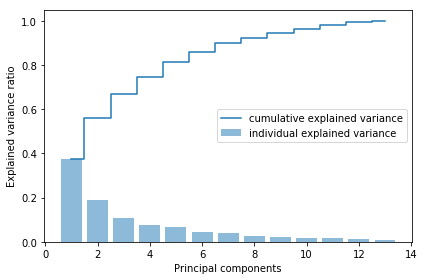

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

### Transformação do espaço de características (geração da matriz W)
Original: 13 características
<br>Novo: 2 características

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


### Plotagem dos dados de treinamento no novo espaço

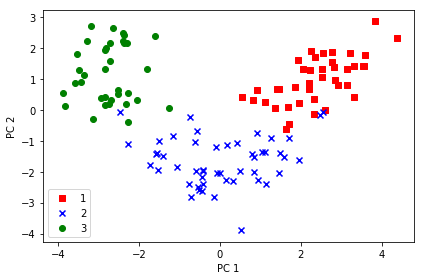

In [16]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()